In [165]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# these are our constants
N = 5  # number of variables
F = 8# forcing

def Lorenz96(x,t):

  # compute state derivatives
    d = np.zeros(N)
  # first the 3 edge cases: i=1,2,N
    d[0] = (x[1] - x[N-2]) * x[N-1] - x[0]
    d[1] = (x[2] - x[N-1]) * x[0]- x[1]
    d[N-1] = (x[0] - x[N-3]) * x[N-2] - x[N-1]
  # then the general case
    for i in range(2, N-1):
        d[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i]
  # add the forcing term
    d = d + F

  # return the state derivatives
    return d

x0 = F*np.ones(N) # initial state (equilibrium)
x0[1] += 0.01 # add small perturbation to 20th variable
t = np.arange(0.0, 200, 0.009)

x = odeint(Lorenz96, x0, t)

In [166]:
#Set the percentage of the time series to remove transient terms from time series
idx_start = int((0.075)*t.size)

x_reshape = x[idx_start:,:]

x_reshape = x_reshape / np.amax(np.absolute(x_reshape))

#add noise to time series
noise_percent = 0.02
noise = np.random.normal(scale=noise_percent*np.max(np.abs(x_reshape)), size=x_reshape.shape)
x_noisy = x_reshape + noise

In [167]:
t.shape

(22223,)

In [168]:





t = t[idx_start:]

x_reshape = np.vstack((x_reshape.T,t)).T
x_noisy = np.vstack((x_noisy.T,t)).T


#x1 = np.vstack((x[idx_start:,0],t)).T
#x2 = np.vstack((x[idx_start:,1],t)).T
#x3 = np.vstack((x[idx_start:,2],t)).T
#x4 = np.vstack((x[idx_start:,3],t)).T
#x5 = np.vstack((x[idx_start:,4],t)).T


#x1_noisy = np.vstack((x_noisy[:,0],t)).T
#x2_noisy = np.vstack((x_noisy[:,1],t)).T
#x3_noisy = np.vstack((x_noisy[:,2],t)).T
#x4_noisy = np.vstack((x_noisy_reshape[:,3],t)).T
#x5_noisy = np.vstack((x_noisy_reshape[:,4],t)).T

In [178]:
np.max(x_noisy[:,2:2])

1.0366560382746595

In [170]:
t.shape

(20557,)

In [171]:
np.save('5var_generated_l96_data/5var_l96_%4.3f/gen_l96_%4.3f.npy'%(t[1]-t[0],t[1] - t[0]), x_reshape)
np.save('5var_generated_l96_data/5var_l96_%4.3f/gen_l96_noisy_%04.3f.npy'%(t[1]-t[0],t[1]-t[0]), x_noisy)

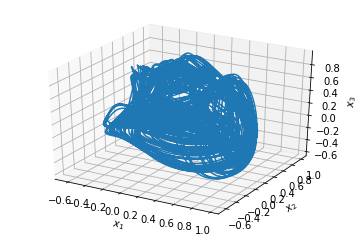

In [172]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
bx = fig.gca(projection='3d')
bx.plot(x_reshape[:,0],x_reshape[:,1],x_reshape[:,2])
bx.set_xlabel('$x_1$')
bx.set_ylabel('$x_2$')
bx.set_zlabel('$x_3$')
plt.show()

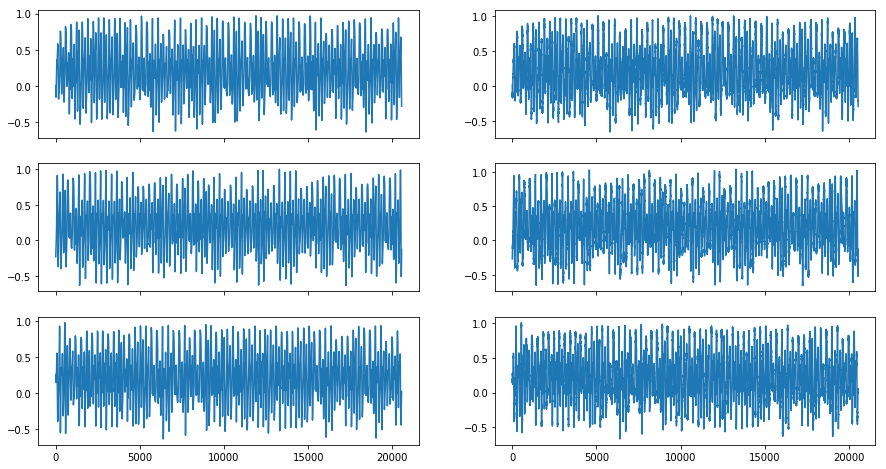

In [173]:
fig, ax = plt.subplots(3,2, sharex=True, figsize=(15,8))

for i in xrange(3):
    for j in xrange(2):
        if j == 0:
            ax[i,j].plot(x_reshape[:,i])
        if j == 1:
            ax[i,j].plot(x_noisy[:,i])

plt.show()

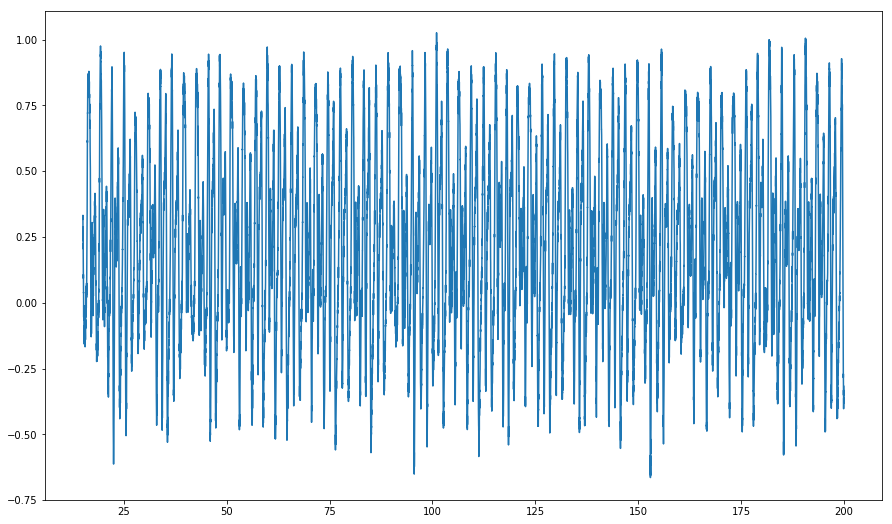

In [95]:
fig1 = plt.figure(figsize = (15,9))
bx = plt.plot(t,np.load('5var_generated_l96_data/5var_l96_0.01/gen_l96_noisy_0.01.npy')[:,4])
plt.show()

In [48]:
ls

5var_generated_l96_data/           MLP-NN L96 Data.ipynb
adapt_l96_N3_anneal_EDIT.py.ipynb  output
adapt_l96_N3_anneal.py             Recurrent Net Guess (Fibonacci).ipynb
ADOLC-Locations_0.tap              submit_multiDH_multiM.sh
l96/                               Untitled1.ipynb
lorenz96.ipynb                     VarAnneal_RNN.ipynb
Lorenz96.ipynb
